# Project 2: Least-Squares Classification

## Step 1: Download and load the MNIST datasets

Download the training and test datasets. Use the provided function to load the first 5000 images and labels of the training dataset

In [1]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

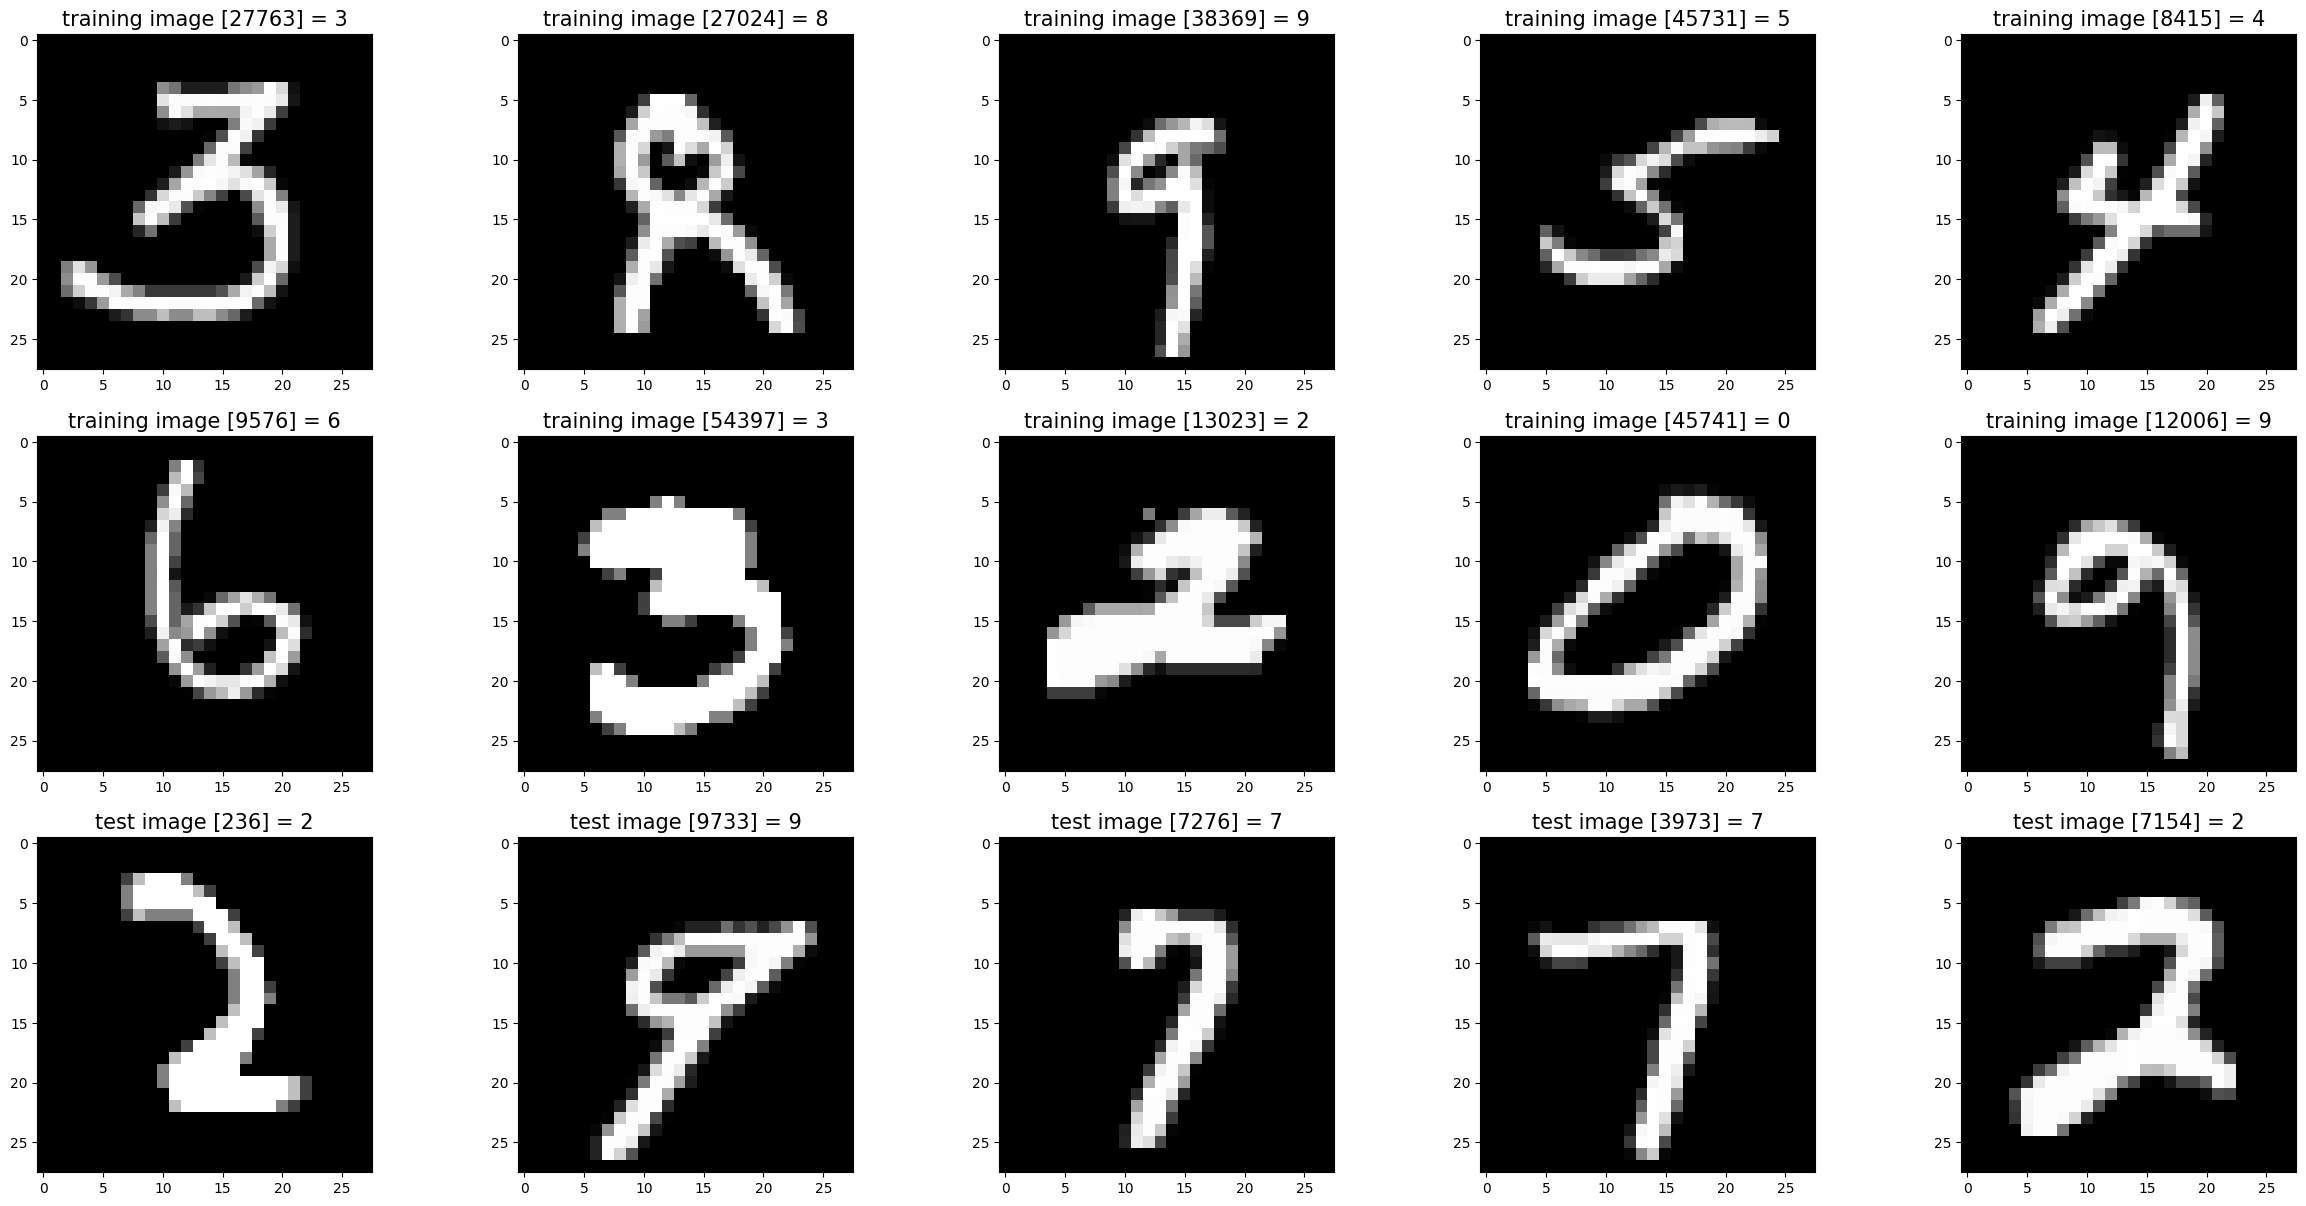

In [2]:
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

# Load MINST dataset

# Implement your code to load: training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath
# mnist_dataloader = 
# (x_train, y_train), (x_test, y_test) = 


# Show some random training and test images 

#id maybe this is right
mnist_dataloader = MnistDataloader(
    training_images_filepath, training_labels_filepath,
    test_images_filepath, test_labels_filepath
)

(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

## Step 2: Preprocess the data

Identify the row and column indices of the pixels that have nonzero intensities in at least 600 of the training images. These will be the features used for classification. 

In [13]:
import numpy as np

# Assuming x_train is a list of 28x28 images (each image is a list or array of shape (28, 28))
num_imgs = len(x_train)
pixel_dimensions = (28, 28)  # Assuming MNIST size (28x28 images)

# Implement your code here

num_features = len(pixels_to_consider)

# Outputs
print(f"Number of features (selected pixels): {num_features}")


## Step 3: Create the least-squares classifier

Construct the matrix $A$ and vector $y$ as 
$$minimize \ \|A\theta - y\|_2 $$
Solve the least-square problem to obtain the parameter vector $\theta$. Create a plot showing the values of the entries of $\theta$ at different pixel locations.

In [14]:
import numpy as np

def create_feature_matrix_and_labels(x_data, y_data, pixels_to_consider, num_imgs=None):
    # implement your code here
    return A, y


## Step 4: Implement the least-squares classifier

Load the first 5000 images of the test dataset. Using these images, compute the error rate, false positive rate, and false negative rate of your classifier.

In [15]:
import numpy as np
from scipy.sparse.linalg import lsqr

# Implement your code here



In [16]:
# Implement your code here to plot a heat map of the learned theta values


In [17]:
import numpy as np

def test_theta_performance(x_test, y_test, pixels_to_consider, theta):
    # implement your code here to compute the error rate, false positive rate, and false negative rate

    return error_rate, false_positive_rate, false_negative_rate

error_rate, false_positive_rate, false_negative_rate = test_theta_performance(x_test, y_test, pixels_to_consider, theta)
print(f"Performance of theta:")
print(f"Error rate: {error_rate}")
print(f"False positive rate: {false_positive_rate}")
print(f"False negative rate: {false_negative_rate}")

## Step 5: Redo training with partial feature list

Repeat steps 1-4, except use only the first 100 images and labels of the training dataset to train the classifier. Use the same features that you identified in Step 2. How did the error rate and false positive/negative rates change?

In [18]:
# Implement your code here

error_rate, false_positive_rate, false_negative_rate = test_theta_performance(x_test, y_test, pixels_to_consider, theta_less_data)
print(f"Performance of theta_less_data:")
print(f"Error rate: {error_rate}")
print(f"False positive rate: {false_positive_rate}")
print(f"False negative rate: {false_negative_rate}")

## Step 6: Feature Selection

In what follows, we will experiment with changing the feature set. Let $M_{0}$ denote the number of features that you identified in Step 2, and let $M = 5000$. Choose a matrix $R \in \mathbb{R}^{M \times M_{0}}$ whose entries are in $\{1, -1\}$ with equal probability. 
Letting $x_{i} \in \mathbb{R}^{M_{0}}$ denote the vector of features from Step 2 for the $i$-th image, the new feature vector is given by $\max{\{Rx_{i},0\}}$. Train a least-squares classifier using this new set of features.

In [19]:
import numpy as np
from scipy.sparse.linalg import lsqr

def LS_classifier_artificial_features(M, R, x_train, y_train, pixels_to_consider, num_imgs):
    # implement your code here
    return theta


In [20]:
# Implement your code to
# Set parameters
# Call the function to solve for theta
theta_arti_features = LS_classifier_artificial_features(M, R, x_train, y_train, pixels_to_consider, num_imgs)

# Output theta to verify
print(f"Solution theta shape: {theta.shape}")
print(f"First few theta values: {theta[:10]}")


## Step 7: Evaluate the new classifier

Compute the error rate, false positive rate, and false negative rate for the new classifier that you constructed in the previous step. Repeat the process with $M=20, 50, 1000, 5000, 10000$. 

In [21]:
import numpy as np

# implement your code here to test the performance

